# Insertion Sort

![Page 18](./insertion-sort.png)

# Implementation

In [37]:
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = [16, 4]
# mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output


def insertion_sort_steps(items: list[int]) -> int:
    """Modified insertion sort to count steps."""
    step_counter = 0
    for i in range(1, len(items)):
        val = items[i]
        j = i - 1
        step_counter += 2
        while j >= 0 and items[j] > val:
            items[j + 1] = items[j]
            j -= 1
            step_counter += 2
        items[j + 1] = val
        step_counter += 1
    return step_counter


def merge_sort_steps(items):
    """Modified merge sort to count steps."""

    def merge(items: list[int], left: int, middle: int, right: int):
        step_counter = 0
        n1 = middle - left + 1
        n2 = right - middle
        L = [items[left + i] for i in range(n1)]
        R = [items[middle + 1 + i] for i in range(n2)]
        i, j, k = 0, 0, left
        step_counter += 1
        while i < n1 and j < n2:
            if L[i] <= R[j]:
                items[k] = L[i]
                i += 1
                step_counter += 1
            else:
                items[k] = R[j]
                j += 1
                step_counter += 1
            k += 1
            step_counter += 1
        rest = L[i:] if i < n1 else R[j:]
        items[k : k + len(rest)] = rest
        step_counter += 2
        return step_counter

    def merge_sort(items: list[int], left: int, right: int):
        step_counter = 0
        if left < right:
            middle = (left + right) // 2
            step_counter += merge_sort(items, left, middle)
            step_counter += merge_sort(items, middle + 1, right)
            step_counter += merge(items, left, middle, right)
        return step_counter

    return merge_sort(items, 0, len(items) - 1)


def heapsort_steps(items: list[int]) -> int:
    def max_heapify(items: list[int], heapsize: int, i: int) -> int:
        step_counter = 0
        left = lambda: 2 * i + 1
        right = lambda: 2 * i + 2
        largest = i
        if left() < heapsize and items[left()] > items[i]:
            largest = left()
        else:
            largest = i

        if right() < heapsize and items[right()] > items[largest]:
            largest = right()

        if largest != i:
            items[i], items[largest] = items[largest], items[i]
            step_counter += 1
            step_counter += max_heapify(items, heapsize, largest)
        step_counter += 1
        return step_counter

    def build_max_heap(items: list[int], heapsize: int) -> int:
        step_counter = 0
        for i in range(heapsize // 2 - 1, -1, -1):
            step_counter += max_heapify(items, heapsize, i)
        return step_counter

    def heap_sort(items) -> int:
        step_counter = build_max_heap(items, len(items))
        for i in range(len(items) - 1, 0, -1):
            items[i], items[0] = items[0], items[i]
            step_counter += 1
            step_counter += max_heapify(items, i, 0)
        return step_counter

    return heap_sort(items)


def quicksort_steps(items: list[int]) -> int:
    def partition(items: list[int], left: int, right: int) -> (int, int):
        step_counter = 0
        x = items[right]
        i = left - 1
        step_counter += 2
        for j in range(left, right):
            if items[j] <= x:
                i += 1
                items[i], items[j] = items[j], items[i]
                step_counter += 2
        items[i + 1], items[right] = items[right], items[i + 1]
        step_counter += 1
        return step_counter, i + 1

    def quicksort(items: list[int], left: int, right: int) -> int:
        step_counter = 0
        if left < right:
            steps, split = partition(items, left, right)
            step_counter += steps
            step_counter += quicksort(items, left, split - 1)
            step_counter += quicksort(items, split + 1, right)
        return step_counter

    step_counter = quicksort(items, 0, len(items) - 1)

    return step_counter

In [38]:
import math


x = []
y = []
c = []
merge_steps = []
heapsort_steps_list = []
quicksort_steps_list = []
c_close = []

count = 6
B = [random.randint(0, 100) for _ in range(count)]
points = 11

for i in range(points):
    clear_output(wait=True)
    print(f"{i+1}/{points}")
    D = B[:]
    i_steps = insertion_sort_steps(D)
    m_steps = merge_sort_steps(B[:])
    h_steps = heapsort_steps(B[:])
    q_steps = quicksort_steps(B[:])
    count *= 2
    B = [random.randint(0, 1000) for _ in range(count)]
    x.append(len(B))
    y.append(i_steps)
    c.append(y[-1] / len(B) ** 2)
    merge_steps.append(m_steps)
    heapsort_steps_list.append(h_steps)
    quicksort_steps_list.append(q_steps)
    c_close.append((len(B) * math.log2(len(B))))
    # heapsort_steps_list_c.append(
    #     heapsort_steps_list[-1] / (len(random_list) * math.log2(len(random_list)))
    # )
    # quicksort_steps_list_c.append(
    #     quicksort_steps_list[-1] / (len(random_list) * math.log2(len(random_list)))
    # )

random_list = B
input_sizes = x
insertion_steps = y
insertion_steps_c = c

11/11


<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipykernel_80476/1755989345.py:7: SyntaxWarning: invalid escape sequence '\T'
  label="$\Theta(n^2)$ (Insertion Sort Estimated)",


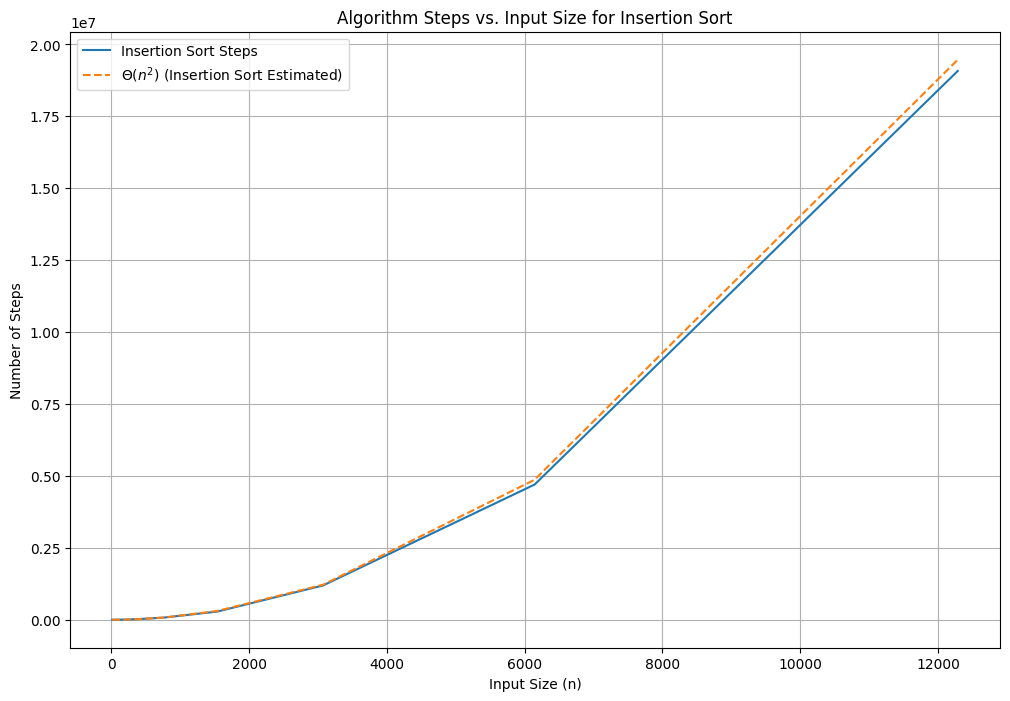

In [53]:
plt.figure(figsize=(12, 8))
c = [[input_size**2 * insertion_steps_c[6]] for input_size in input_sizes]
plt.plot(input_sizes, insertion_steps, label="Insertion Sort Steps")
plt.plot(
    input_sizes,
    c,
    label="$\Theta(n^2)$ (Insertion Sort Estimated)",
    linestyle="--",
)
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Steps")
plt.title("Algorithm Steps vs. Input Size for Insertion Sort")
plt.legend()
plt.grid(True)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipykernel_80476/3419856355.py:10: SyntaxWarning: invalid escape sequence '\T'
  label="$\Theta(nlgn)$ (Merge Sort Estimated)",


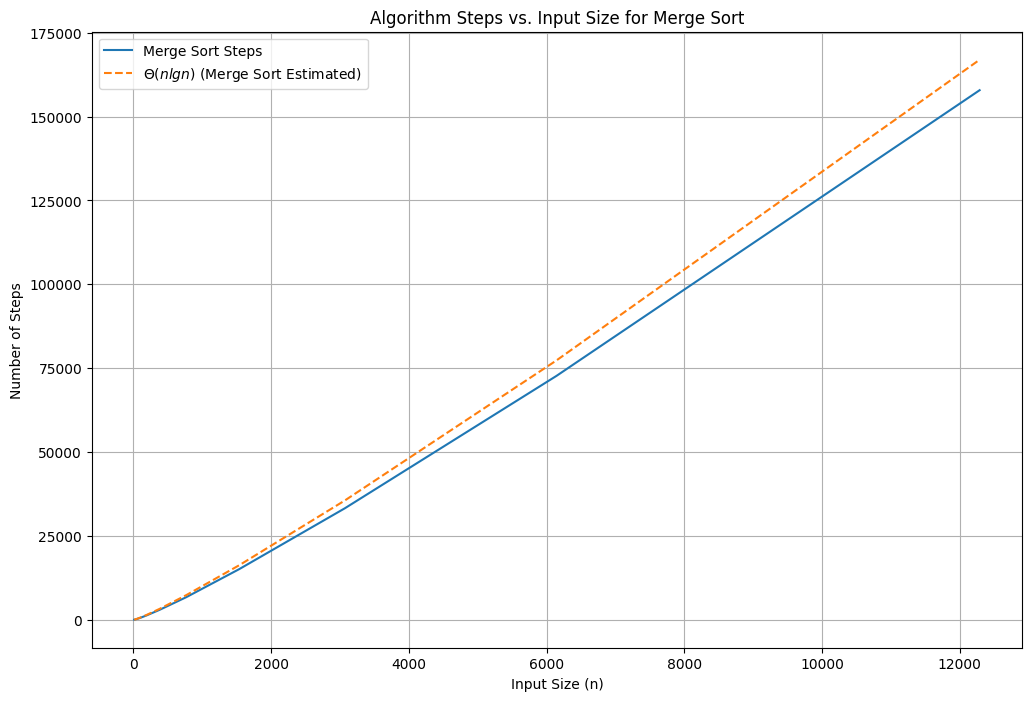

In [51]:
plt.figure(figsize=(12, 8))
c = [
    [input_size**2 * (merge_steps[i] / c_close[6])]
    for i, input_size in enumerate(input_sizes)
]
plt.plot(input_sizes, merge_steps, label="Merge Sort Steps")
plt.plot(
    input_sizes,
    [c * math.log2(c) for c in input_sizes],
    label="$\Theta(nlgn)$ (Merge Sort Estimated)",
    linestyle="--",
)
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Steps")
plt.title("Algorithm Steps vs. Input Size for Merge Sort")
plt.legend()
plt.grid(True)
plt.show()

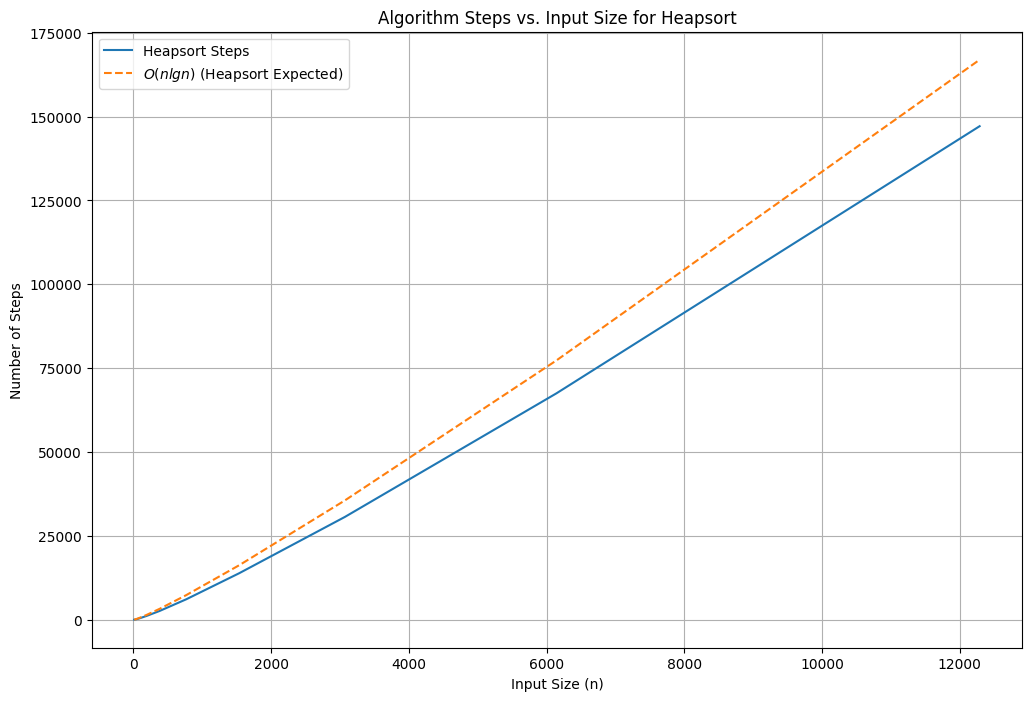

In [52]:
plt.figure(figsize=(12, 8))
c = [
    [input_size**2 * (heapsort_steps_list[i] / c_close[6])]
    for i, input_size in enumerate(input_sizes)
]
plt.plot(input_sizes, heapsort_steps_list, label="Heapsort Steps")
plt.plot(
    input_sizes,
    [c * math.log2(c) for c in input_sizes],
    label="$O(nlgn)$ (Heapsort Expected)",
    linestyle="--",
)

plt.xlabel("Input Size (n)")
plt.ylabel("Number of Steps")
plt.title("Algorithm Steps vs. Input Size for Heapsort")
plt.legend()
plt.grid(True)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipykernel_80476/4220065415.py:10: SyntaxWarning: invalid escape sequence '\T'
  label="$\Theta(nlgn)$ (Quicksort Expected)",


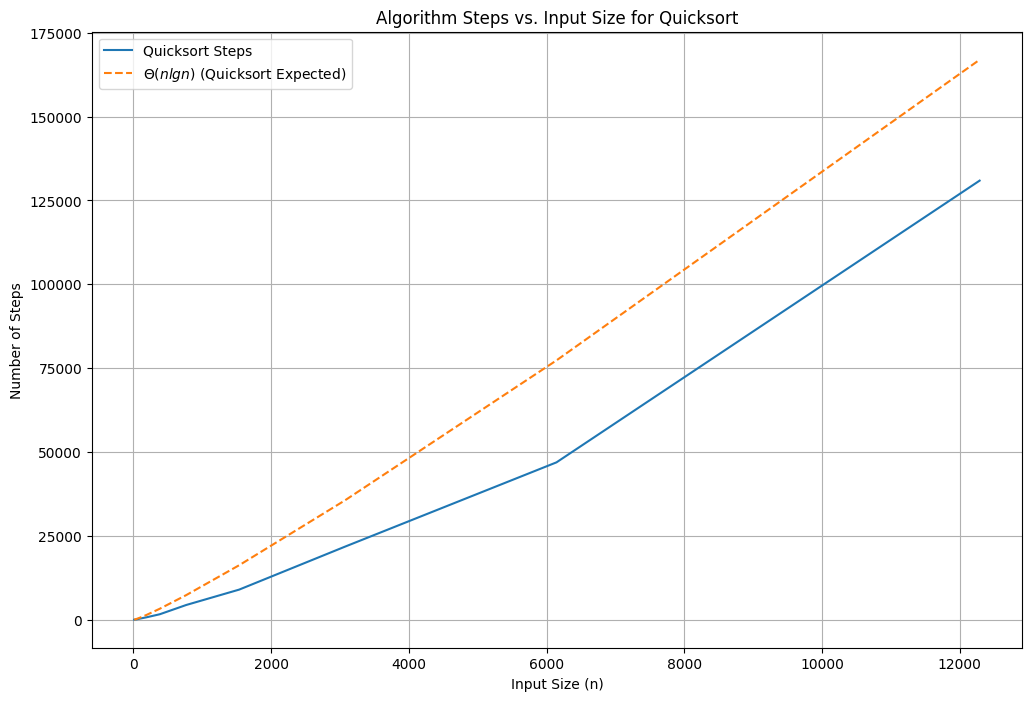

In [30]:
plt.figure(figsize=(12, 8))
c = [
    [input_size**2 * (quicksort_steps_list[i] / c_close[6])]
    for i, input_size in enumerate(input_sizes)
]
plt.plot(input_sizes, quicksort_steps_list, label="Quicksort Steps")
plt.plot(
    input_sizes,
    [c * math.log2(c) for c in input_sizes],
    label="$\Theta(nlgn)$ (Quicksort Expected)",
    linestyle="--",
)
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Steps")
plt.title("Algorithm Steps vs. Input Size for Quicksort")
plt.legend()
plt.grid(True)
plt.show()